# Google Playstore Apps EDA 
---
complete EDA analysis for begninners to Advacne EDA 
<br>
link to Dataset : [Here](https://www.kaggle.com/datasets/lava18/google-play-store-apps/) <br>
1. **Context**
    While many public datasets (on Kaggle and the like) provide Apple App Store data, there are not many counterpart datasets available for Google Play Store apps anywhere on the web. On digging deeper, I found out that iTunes App Store page deploys a nicely indexed appendix-like structure to allow for simple and easy web scraping. On the other hand, Google Play Store uses sophisticated modern-day techniques (like dynamic page load) using JQuery making scraping more challenging. <br>
2. **Content**
    Each app (row) has values for catergory, rating, size, and more.

**Steps**
* Importing Libraries
* loading the dataset
* Explorting the data

## importing libraries

In [1]:
import pandas as pd 
import numpy as np 
import skimpy as skim
import matplotlib as plt 
%matplotlib inline
import seaborn as sns


## loading the dataset

In [2]:
df= pd.read_csv('./Datasets/googleplaystore.csv')


### Coloumns
* App 
* Category
* Ratinng
* Reviews 
* Size 
* Installs
* Type 
* Price
* Content Ratinng 
* Generes
* Last Updated
* Current Ver
* Android Ver

In [3]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,25-Jul-17,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,6-Jul-18,1,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,20-Jan-17,1,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,19-Jan-15,Varies with device,Varies with device


## Exploring the data

### important things to remember 
* set option to be maximum for rows and coloumn
* hiding warnings

In [4]:
#set option to be maximum for rows and coloumn
pd.set_option('display.max_rows',None)   
pd.set_option('display.max_column',None)

In [5]:
# hiding all warnings
import warnings
warnings.filterwarnings('ignore')

### getting info about data
- no of columns
- shape of data
- information of data 

In [6]:
# no of coloumns in dataset
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [7]:
# shape of the data set for rows and coloumns
df.shape
print(f"Total number of rows : {df.shape[0]} \nTotal number of Coloumns : {df.shape[1]}")

Total number of rows : 10841 
Total number of Coloumns : 13


In [8]:
# quick info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10839 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


## cleaning the  Data   and Making it consistent


### making size a numeric coloumn
---
**Observations**
 1. Varies with Device
 2. M 
 3. K 
---

In [9]:
#  checking unique values
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [10]:
# checking if there are missing value in size coloumn
df['Size'].isnull().sum()

np.int64(0)

In [11]:
# finding the values M in them total sum
df['Size'].loc[df['Size'].str.contains('M')].value_counts().sum()

np.int64(8830)

In [12]:
# finding the values k in them total sum
df['Size'].loc[df['Size'].str.contains('k')].value_counts().sum()

np.int64(316)

In [13]:
# finding the values 'varibales with device' 
df['Size'].loc[df['Size'].str.contains('k')].value_counts().sum()

np.int64(316)

In [14]:
 # converting whole size coloumn into bytes

def convert_size(size):
    if isinstance(size,str):
        if 'M' in size:
            return float(size.replace('M',''))*1024*1024
        elif 'k' in size:
            return float(size.replace('k',''))*1024
        elif 'Varies with device' in size:
            return np.nan
        else:
            return float(size)
    else:
        return size


In [15]:
df['Size']=df['Size'].apply(convert_size)

In [16]:
df['Size']

0         19922944.0
1         14680064.0
2          9122611.2
3         26214400.0
4          2936012.8
5          5872025.6
6         19922944.0
7         30408704.0
8         34603008.0
9          3250585.6
10        29360128.0
11        12582912.0
12        20971520.0
13        22020096.0
14        38797312.0
15         2831155.2
16         5767168.0
17        17825792.0
18        40894464.0
19        32505856.0
20        14680064.0
21        12582912.0
22         4404019.2
23         7340032.0
24        24117248.0
25         6291456.0
26        26214400.0
27         6396313.6
28         4823449.6
29         4404019.2
30         9646899.2
31         5452595.2
32        11534336.0
33        11534336.0
34         4404019.2
35         9646899.2
36        25165824.0
37               NaN
38        11534336.0
39         9856614.4
40        15728640.0
41        10485760.0
42               NaN
43         1258291.2
44        12582912.0
45        25165824.0
46        27262976.0
47         83

In [17]:
# rename the coloum 
df.rename(columns={'Size':'Size_in_bytes'},inplace=True)

In [18]:
# size in mb 
df['Size_in_mb']=df['Size_in_bytes'].apply(lambda x: x/1024/1024)


In [19]:
df.head()

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_mb
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up,19.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up,14.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up,8.7
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up,25.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up,2.8


----

### Now Install coloumn
issues that there are + signs with each values we have to fix it. 
there are no null values

-----
Steps 
* remove '+' sign
* removce comma from values
* converting column into integars
  

In [20]:
# checking unique values
df['Installs'].unique

<bound method Series.unique of 0               10,000+
1              500,000+
2            5,000,000+
3           50,000,000+
4              100,000+
5               50,000+
6               50,000+
7            1,000,000+
8            1,000,000+
9               10,000+
10           1,000,000+
11           1,000,000+
12          10,000,000+
13             100,000+
14             100,000+
15               5,000+
16             500,000+
17              10,000+
18           5,000,000+
19          10,000,000+
20             100,000+
21             100,000+
22             500,000+
23             100,000+
24              50,000+
25              10,000+
26             500,000+
27             100,000+
28              10,000+
29             100,000+
30             100,000+
31              50,000+
32             100,000+
33             100,000+
34              10,000+
35             100,000+
36             500,000+
37           5,000,000+
38              10,000+
39             500,000+
40       

In [21]:
#
df['Installs'].value_counts()

Installs
1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             908
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Name: count, dtype: int64

In [22]:
# checking missing values
df['Installs'].isnull().sum()

np.int64(0)

In [23]:
# removing + sign 
df['Installs']=df['Installs'].apply(lambda x: x.replace('+','') if '+' in str(x) else x)




In [24]:
# removing , sing

df['Installs']=df['Installs'].apply(lambda x: x.replace(',','') if ',' in str(x) else x)


In [25]:
# converting into integar type 
df['Installs']=df['Installs'].apply(lambda x: int(x))

In [26]:
df['Installs'].value_counts()

Installs
1000000       1579
10000000      1252
100000        1169
10000         1054
1000           908
5000000        752
100            719
500000         539
50000          479
5000           477
100000000      409
10             386
500            330
50000000       289
50             205
5               82
500000000       72
1               67
1000000000      58
0               15
Name: count, dtype: int64

### Price Column
----
issue: dollor sign with values 
To fix  
- Remove the dollor signs 

In [27]:
df['Price'].unique()

array(['0', '$4.99 ', '$3.99 ', '$6.99 ', '$1.49 ', '$2.99 ', '$7.99 ',
       '$5.99 ', '$3.49 ', '$1.99 ', '$9.99 ', '$7.49 ', '$0.99 ',
       '$9.00 ', '$5.49 ', '$10.00 ', '$24.99 ', '$11.99 ', '$79.99 ',
       '$16.99 ', '$14.99 ', '$1.00 ', '$29.99 ', '$12.99 ', '$2.49 ',
       '$10.99 ', '$1.50 ', '$19.99 ', '$15.99 ', '$33.99 ', '$74.99 ',
       '$39.99 ', '$3.95 ', '$4.49 ', '$1.70 ', '$8.99 ', '$2.00 ',
       '$3.88 ', '$25.99 ', '$399.99 ', '$17.99 ', '$400.00 ', '$3.02 ',
       '$1.76 ', '$4.84 ', '$4.77 ', '$1.61 ', '$2.50 ', '$1.59 ',
       '$6.49 ', '$1.29 ', '$5.00 ', '$13.99 ', '$299.99 ', '$379.99 ',
       '$37.99 ', '$18.99 ', '$389.99 ', '$19.90 ', '$8.49 ', '$1.75 ',
       '$14.00 ', '$4.85 ', '$46.99 ', '$109.99 ', '$154.99 ', '$3.08 ',
       '$2.59 ', '$4.80 ', '$1.96 ', '$19.40 ', '$3.90 ', '$4.59 ',
       '$15.46 ', '$3.04 ', '$4.29 ', '$2.60 ', '$3.28 ', '$4.60 ',
       '$28.99 ', '$2.95 ', '$2.90 ', '$1.97 ', '$200.00 ', '$89.99 ',
       '$2.56 '

In [28]:
# how many valuess have $ signs 
values_with_dollar_sign=df['Price'].loc[df['Price'].str.contains('\$')].value_counts().sum()
print(f"Total number of values with $ sign is {values_with_dollar_sign}")

Total number of values with $ sign is 800


In [29]:
# how many valuess have other than $ signs 
values_with_dollar_sign=df['Price'].loc[~df['Price'].str.contains('\$')].value_counts().sum()
print(f"Total number of values with $ sign is {values_with_dollar_sign}")

Total number of values with $ sign is 10041


In [30]:
# removing $ sing

df['Price']=df['Price'].apply(lambda x: x.replace('$','') if '$' in str(x) else x)


In [31]:
# now converting into integeras
 
df['Price']=df['Price'].apply(lambda x: float(x))

In [32]:
df['Price'].value_counts()

Price
0.00      10041
0.99        148
2.99        129
1.99         73
4.99         72
3.99         63
1.49         46
5.99         30
2.49         26
9.99         21
6.99         13
399.99       12
14.99        11
4.49          9
29.99         7
3.49          7
7.99          7
24.99         7
5.49          6
19.99         6
6.49          5
8.99          5
12.99         5
11.99         5
10.00         3
1.00          3
16.99         3
2.00          3
17.99         2
10.99         2
9.00          2
79.99         2
7.49          2
3.95          2
33.99         2
1.70          2
13.99         2
8.49          2
39.99         2
1.50          1
25.99         1
74.99         1
15.99         1
3.88          1
1.76          1
3.02          1
400.00        1
4.84          1
2.50          1
1.59          1
1.61          1
4.77          1
5.00          1
1.29          1
379.99        1
299.99        1
37.99         1
18.99         1
389.99        1
19.90         1
1.75          1
14.00         1
4.

In [33]:
# print min,mac and avergae price for thhe app
print(f"Min price is {df['Price'].min()}")
print(f"Max price is {df['Price'].max()}") 
print(f"Average price is {df['Price'].mean()}")


Min price is 0.0
Max price is 400.0
Average price is 1.0272733142699015


---- 

## Missing Values


In [34]:
df.isnull().sum()

App                  0
Category             1
Rating            1474
Reviews              0
Size_in_bytes     1695
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               1
Last Updated         0
Current Ver          8
Android Ver          2
Size_in_mb        1695
dtype: int64

In [35]:
# total number of missing values
df.isnull().sum().sum()

np.int64(4877)

In [36]:
import matplotlib.pyplot as plt

<Axes: >

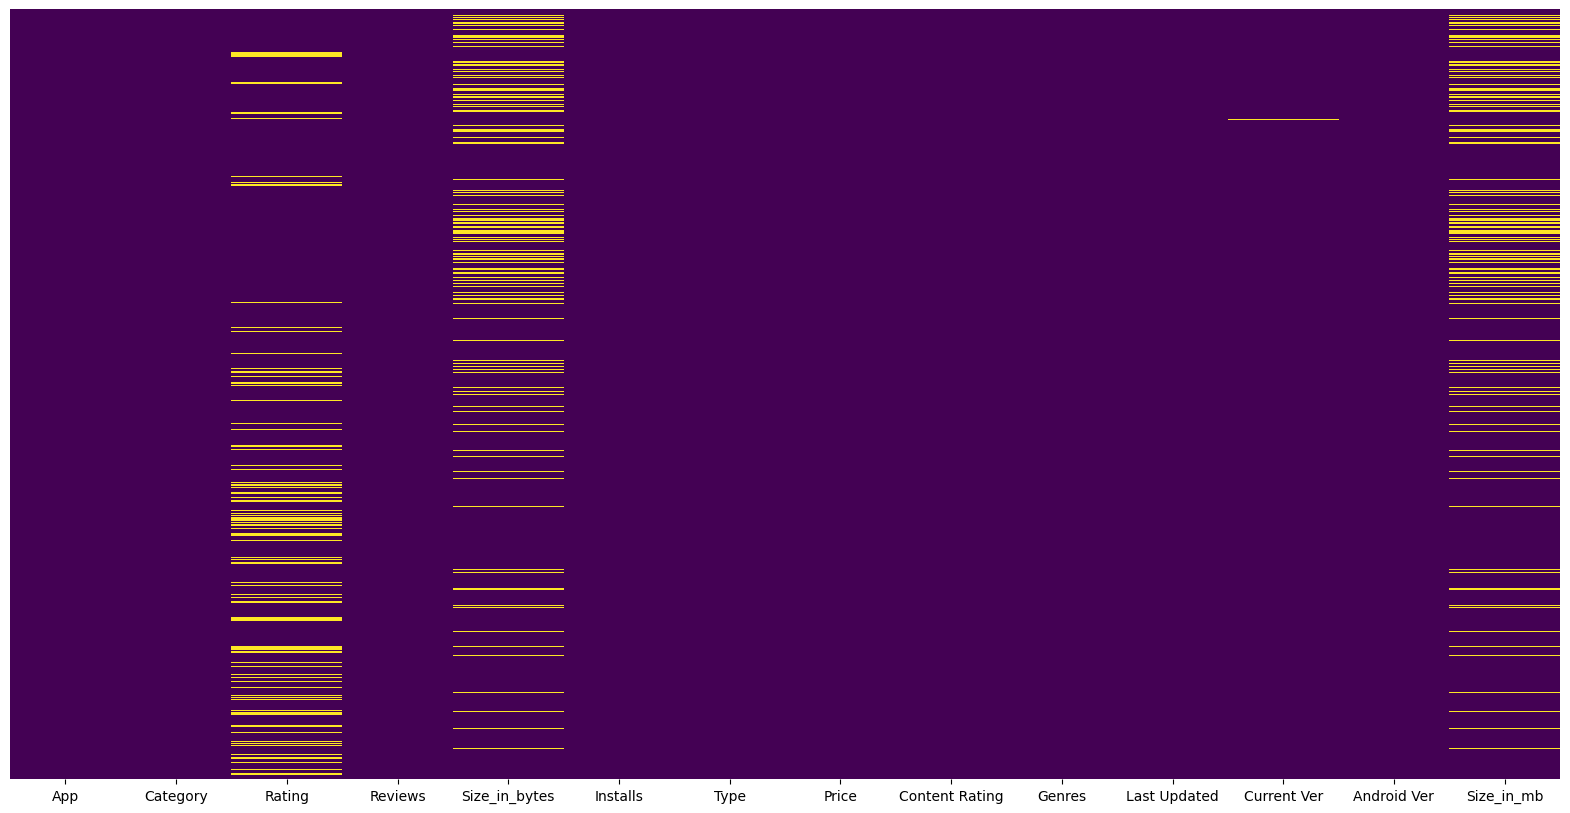

In [37]:
 # plot missing values
plt.figure(figsize=(20,10))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
